## Consumption analysis
### Author : Nicolas Lacroix (https://github.com/NicolasLacroix)

Licence : [Apache License 2.0]

Data provided by [DataSud]

Source file link (csv) : https://trouver.datasud.fr/dataset/8bfa93b0-ac2f-4148-b550-0ec5c917bb28/resource/52a8f5dd-758d-4e54-a837-8fc7ad57d378/download/eco2mix-regional-tr.csv

[DataSud]: https://www.datasud.fr/

[Apache License 2.0]: https://github.com/NicolasLacroix/data-representation/blob/master/LICENSE

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn

import dateutil.parser
from datetime import datetime, date

In [85]:
data_link = 'https://trouver.datasud.fr/dataset/8bfa93b0-ac2f-4148-b550-0ec5c917bb28/resource/52a8f5dd-758d-4e54-a837-8fc7ad57d378/download/eco2mix-regional-tr.csv'
data = pd.read_csv(data_link, delimiter=';', encoding='utf_8', parse_dates=True)

In [86]:
data

,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 26
0,93,Provence-Alpes-Côte d'Azur,Données temps réel,2019-12-01,00:15,2019-12-01T00:15:00+01:00,5041.0,1475.0,NaN,31.0,...,NaN,0.61,64.58,0.00,0.00,26.74,41.25,2.06,35.49,NaN
1,93,Provence-Alpes-Côte d'Azur,Données temps réel,2019-12-01,02:30,2019-12-01T02:30:00+01:00,4673.0,1423.0,NaN,33.0,...,NaN,0.71,68.75,0.00,0.00,26.96,38.56,2.16,34.47,NaN
2,93,Provence-Alpes-Côte d'Azur,Données temps réel,2019-12-01,08:45,2019-12-01T08:45:00+01:00,4519.0,1422.0,NaN,4.0,...,NaN,0.09,8.33,0.75,2.63,29.74,41.13,2.30,35.49,NaN
3,93,Provence-Alpes-Côte d'Azur,Données temps réel,2019-12-01,10:00,2019-12-01T10:00:00+01:00,4939.0,1467.0,NaN,1.0,...,NaN,0.02,2.08,1.44,5.49,28.69,43.36,2.04,34.47,NaN
4,93,Provence-Alpes-Côte d'Azur,Données temps réel,2019-12-01,11:45,2019-12-01T11:45:00+01:00,5308.0,1474.0,NaN,2.0,...,NaN,0.04,4.17,1.73,7.11,28.94,47.00,1.98,35.84,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6043,93,Provence-Alpes-Côte d'Azur,Données prévisionnelles,2020-02-01,20:15,2020-02-01T20:15:00+01:00,5419.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN
6044,93,Provence-Alpes-Côte d'Azur,Données prévisionnelles,2020-02-01,20:45,2020-02-01T20:45:00+01:00,5305.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN
6045,93,Provence-Alpes-Côte d'Azur,Données prévisionnelles,2020-02-01,21:15,2020-02-01T21:15:00+01:00,5161.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN
6046,93,Provence-Alpes-Côte d'Azur,Données prévisionnelles,2020-02-01,22:15,2020-02-01T22:15:00+01:00,5038.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN


In [87]:
# TODO: use parse_date=True in pd.read_csv method instead
data['Date'] = pd.to_datetime(data['Date'])
data['Heure'] = pd.to_datetime(data['Heure'], format='%H:%M', utc=True).dt.time
data['Date - Heure'] = pd.to_datetime(data['Date - Heure'], format='%Y-%m-%dT%H:%M:%S')
data

,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 26
0,93,Provence-Alpes-Côte d'Azur,Données temps réel,2019-12-01,00:15:00,2019-12-01 00:15:00+01:00,5041.0,1475.0,NaN,31.0,...,NaN,0.61,64.58,0.00,0.00,26.74,41.25,2.06,35.49,NaN
1,93,Provence-Alpes-Côte d'Azur,Données temps réel,2019-12-01,02:30:00,2019-12-01 02:30:00+01:00,4673.0,1423.0,NaN,33.0,...,NaN,0.71,68.75,0.00,0.00,26.96,38.56,2.16,34.47,NaN
2,93,Provence-Alpes-Côte d'Azur,Données temps réel,2019-12-01,08:45:00,2019-12-01 08:45:00+01:00,4519.0,1422.0,NaN,4.0,...,NaN,0.09,8.33,0.75,2.63,29.74,41.13,2.30,35.49,NaN
3,93,Provence-Alpes-Côte d'Azur,Données temps réel,2019-12-01,10:00:00,2019-12-01 10:00:00+01:00,4939.0,1467.0,NaN,1.0,...,NaN,0.02,2.08,1.44,5.49,28.69,43.36,2.04,34.47,NaN
4,93,Provence-Alpes-Côte d'Azur,Données temps réel,2019-12-01,11:45:00,2019-12-01 11:45:00+01:00,5308.0,1474.0,NaN,2.0,...,NaN,0.04,4.17,1.73,7.11,28.94,47.00,1.98,35.84,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6043,93,Provence-Alpes-Côte d'Azur,Données prévisionnelles,2020-02-01,20:15:00,2020-02-01 20:15:00+01:00,5419.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN
6044,93,Provence-Alpes-Côte d'Azur,Données prévisionnelles,2020-02-01,20:45:00,2020-02-01 20:45:00+01:00,5305.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN
6045,93,Provence-Alpes-Côte d'Azur,Données prévisionnelles,2020-02-01,21:15:00,2020-02-01 21:15:00+01:00,5161.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN
6046,93,Provence-Alpes-Côte d'Azur,Données prévisionnelles,2020-02-01,22:15:00,2020-02-01 22:15:00+01:00,5038.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN


In [88]:
volumeLabels = list(data.columns.values)[6:15]
percentLabels = list(data.columns.values)[15:-1]

In [89]:
def getDailyData(data, *args):
    if len(args) == 0:
        raise ValueError('args must be non-empty')
    param = []
    for elem in args:
        if type(elem) is list:
            param += elem
        else:
            param.append(elem)
    res = {}
    for date, values in data.groupby(['Date']):
        res[date.strftime('%Y-%m-%d')] = values[param]
    return res

In [90]:
dailyData = getDailyData(data, 'Date - Heure', volumeLabels)
dailyData

{'2019-12-01':                   Date - Heure  Consommation (MW)  Thermique (MW)  \
 0    2019-12-01 00:15:00+01:00             5041.0          1475.0   
 1    2019-12-01 02:30:00+01:00             4673.0          1423.0   
 2    2019-12-01 08:45:00+01:00             4519.0          1422.0   
 3    2019-12-01 10:00:00+01:00             4939.0          1467.0   
 4    2019-12-01 11:45:00+01:00             5308.0          1474.0   
 ...                        ...                ...             ...   
 4853 2019-12-01 18:15:00+01:00             5273.0          1455.0   
 4854 2019-12-01 19:15:00+01:00             5479.0          1463.0   
 4855 2019-12-01 20:45:00+01:00             5083.0          1404.0   
 4856 2019-12-01 21:15:00+01:00             4967.0          1473.0   
 4857 2019-12-01 21:30:00+01:00             4890.0          1430.0   
 
       Nucléaire (MW)  Eolien (MW)  Solaire (MW)  Hydraulique (MW)  \
 0                NaN         31.0           0.0            1348.0   
 1  

In [91]:
def visualize(data, x, y=None, subplots=False, kind='line'):
    if not y:
        ax = data.plot(subplots=subplots, kind=kind, x=x)
    else:
        ax = data.plot(subplots=subplots, kind=kind, x=x, y=y)
    plt.show()

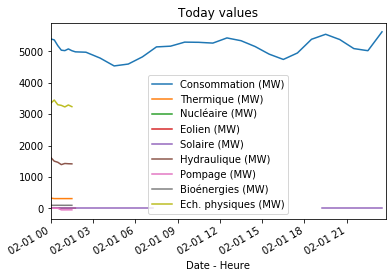

In [92]:
# Today values
today = date.today().strftime("%Y-%m-%d")
dailyData[today].plot(x='Date - Heure', title="Today values")

In [93]:
def getExtremums(data, key):
    dailyData = getDailyData(data, 'Date - Heure', volumeLabels) # get dataframes per day
    min_serie = data.loc[data[key] == min(data[key])]['Date'] # Date column of data's serie where data[key] is min
    min_df = dailyData[pd.to_datetime(min_serie.values[0]).strftime('%Y-%m-%d')] # cell's value (date) to string
    max_serie = data.loc[data[key] == max(data[key])]['Date'] # Date column of data's serie where data[key] is max
    max_df = dailyData[pd.to_datetime(max_serie.values[0]).strftime('%Y-%m-%d')] # cell's value (date) to string
    return min_df, max_df

In [94]:
min_df, max_df = getExtremums(data, 'Consommation (MW)')

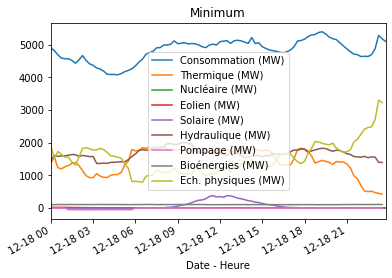

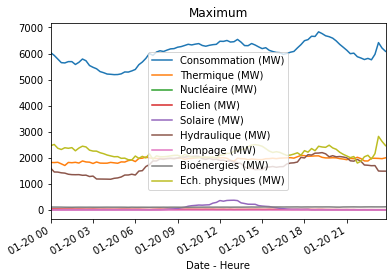

In [95]:
min_df.plot(x='Date - Heure', title="Minimum")
max_df.plot(x='Date - Heure', title="Maximum")

In [96]:
avg_df = data.mean()
avg_df

Code INSEE région        93.000000
Consommation (MW)      5385.177443
Thermique (MW)         1149.730314
Nucléaire (MW)                 NaN
Eolien (MW)              12.311835
Solaire (MW)            105.668003
Hydraulique (MW)       1422.474316
Pompage (MW)             -4.973133
Bioénergies (MW)        107.819703
Ech. physiques (MW)    2585.731835
TCO Thermique (%)        21.046958
TCH Thermique (%)        35.074785
TCO Nucléaire (%)              NaN
TCH Nucléaire (%)              NaN
TCO Eolien (%)            0.233444
TCH Eolien (%)           25.649443
TCO Solaire (%)           1.941429
TCH Solaire (%)           8.165963
TCO Hydraulique (%)      26.347056
TCH Hydraulique (%)      43.527421
TCO Bioénergies (%)       2.015098
TCH Bioénergies (%)      36.798765
Column 26                      NaN
dtype: float64

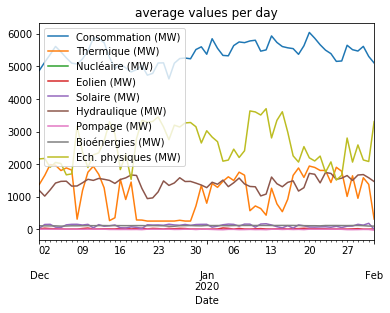

In [97]:
# average values per day
avg_day = data[['Date'] + volumeLabels].groupby(['Date']).agg(np.mean)
avg_day.plot(title="average values per day")

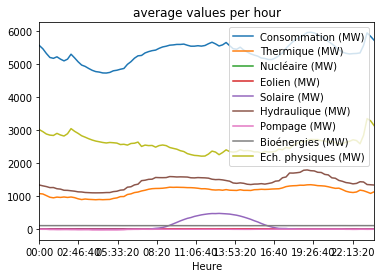

In [98]:
# average values per hour
avg_hr = data[['Heure'] + volumeLabels].groupby(['Heure']).agg(np.mean)
ax = avg_hr.plot(title="average values per hour")

Text(0, 0.5, '')

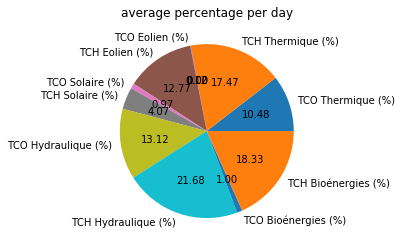

In [99]:
# average percentage per day
percent_df = data[percentLabels].mean()
ax = percent_df.plot(autopct='%.2f', kind='pie', title='average percentage per day')
ax.set_ylabel('')

In [100]:
def extractDate(data):
    data['Minute'] = data["Heure"].apply(lambda x : x.minute)
    data["Heure"] = data["Heure"].apply(lambda x : x.hour)
    data["Heure"] = data["Heure"].values.astype(np.float64)
    data["Minute"] = data["Minute"].values.astype(np.float64)
    return data

In [101]:
# prediction part
# scaling the training data
TRAIN_SPLIT = 100 # size of the training dataset
#data_train = data[["Consommation (MW)", "Date", "Heure"]][:TRAIN_SPLIT]
data_train = data[["Heure"]][:TRAIN_SPLIT]
#data_train_mean = data_train["Consommation (MW)"].mean()
#data_train_std = data_train["Consommation (MW)"].std()
#data_train["Consommation (MW)"] = (data_train["Consommation (MW)"]-data_train_mean)/data_train_std
# converting date and time
#data_train["Date"] = data_train["Date"].values.astype(np.float64)
"""data_train['Minute'] = data_train["Heure"].apply(lambda x : x.minute)
data_train["Heure"] = data_train["Heure"].apply(lambda x : x.hour)
data_train["Heure"] = data_train["Heure"].values.astype(np.float64)
data_train["Minute"] = data_train["Minute"].values.astype(np.float64)"""
data_train = extractDate(data_train)
data_train

,Heure,Minute
0,0.0,15.0
1,2.0,30.0
2,8.0,45.0
3,10.0,0.0
4,11.0,45.0
...,...,...
95,15.0,15.0
96,16.0,30.0
97,16.0,45.0
98,18.0,30.0


In [102]:
# target definition
target_data = data[["Consommation (MW)"]][:TRAIN_SPLIT]
# data_train_mean = target_data["Consommation (MW)"].mean()
# data_train_std = target_data["Consommation (MW)"].std()
# target_data["Consommation (MW)"] = (target_data["Consommation (MW)"]-data_train_mean)/data_train_std
# target_data[["Date", "Heure"]] = target_data[["Date", "Heure"]].values.astype(np.float64)
# target_data = extractDate(target_data)
target_data

,Consommation (MW)
0,5041.0
1,4673.0
2,4519.0
3,4939.0
4,5308.0
...,...
95,5479.0
96,5400.0
97,5416.0
98,5912.0


In [103]:
# number of criterias : Date - Time
nbIn = data_train.shape[1]
# neural network statistics
nbOut = 1
nbHidden = 100
# définition of the neural network
neuralNetwork = nn.Sequential(nn.Linear(nbIn,nbHidden), nn.ReLU(), nn.Linear(nbHidden,nbOut))
neuralNetwork

Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=1, bias=True)
)

In [104]:
# launch criterias + optimizing options
criterion = nn.MSELoss() # MSELoss = moindres carrés
optimizer = torch.optim.SGD(neuralNetwork.parameters(), lr=0.000003) # lr = learning rate
nbEpochs = 1000 # nombre d'itérations

In [105]:
# converting data (to pytorch tensor)
input_data = torch.FloatTensor(data_train.values)
target = torch.FloatTensor(target_data.values)
#target = torch.FloatTensor(target_data.values.reshape((TRAIN_SPLIT, )))
#target = target.unsqueeze(0)

In [106]:
items = []
# launching iterations
for epoch in range(nbEpochs):
    optimizer.zero_grad() # zero_grad = ?
    output = neuralNetwork(input_data)
    loss = criterion(output, target) # calcul de la fonction cout (moindres carrés)
    loss.backward() # calcul du gradient (sens = droite vers gauche)
    optimizer.step() # ? (modification des parametres du réseau de neurones)
    print(loss.item())
    items.append(loss.item())

28369378.0
26267820.0
22399846.0
14388910.0
7379201.5
6643280.5
6136617.5
5713799.0
5360277.0
5064569.5
4820648.0
4623190.5
4466829.0
4345670.0
4253718.5
4185138.25
4134680.75
4097830.75
4070883.0
4051156.25
4036605.5
4025614.5
4016927.0
4009653.75
4003289.25
3997481.5
3991999.75
3986686.75
3981446.5
3976191.0
3971028.25
3965854.75
3960589.0
3955374.0
3950137.25
3944866.0
3939579.25
3934168.0
3928668.25
3923141.75
3917556.75
3911924.5
3906314.25
3900720.25
3895052.5
3889301.0
3883475.25
3877577.5
3871622.5
3865613.75
3859551.25
3853413.75
3847189.75
3840880.25
3834490.0
3828011.5
3821450.5
3814810.25
3808090.5
3801288.25
3794394.25
3787424.0
3780370.5
3773228.5
3765998.75
3758694.5
3751310.75
3743849.0
3736314.5
3728710.5
3721031.0
3713274.5
3705450.5
3697565.5
3689609.25
3681598.0
3673522.0
3665397.75
3657211.0
3648959.0
3640654.5
3632303.75
3623909.5
3615481.25
3607007.25
3598491.75
3589928.25
3581324.5
3572679.0
3564019.0
3555347.0
3546663.0
3537965.5
3529175.75
3520183.25
3511039.7

2395831.5
2535115.25
2406808.25
2551587.0
2424198.75
2589319.0
2448347.5
2612507.0
2462257.5
2630199.5
2476707.5
2664117.0
2493664.0
2671350.0
2500550.75
2700821.5
2508254.0
2696643.25
2499553.5
2681332.75
2484506.0
2661931.75
2466009.0
2631477.0
2444394.25
2609134.75
2425029.25
2579698.75
2407111.75
2564793.0
2395968.75
2553349.75
2390245.0
2547316.25
2386822.0
2555400.75
2390931.25
2547872.25
2388932.5
2560968.75
2395868.25
2569789.25
2409345.25
2605872.25
2423019.25
2605809.25
2420403.25
2601011.5
2414075.5
2595778.25
2407734.75
2588751.0
2401017.5
2579305.0
2392477.0
2569976.0
2384328.5
2560012.75
2376522.5
2550888.75
2369632.0
2551207.75
2367003.5
2539045.0
2360380.5
2543238.5
2360348.0
2536468.25
2357579.0
2544709.0
2359857.0
2541247.0
2358827.5
2552510.5
2360898.5
2539886.0
2364147.75
2579349.0
2377282.25
2572839.5
2372434.25
2580743.0
2369275.0
2554407.75
2359073.5
2571399.0
2358006.75
2532942.25
2347560.75
2565067.0
2351841.75
2552997.75
2348971.75
2560539.25
2348962.0
2558432

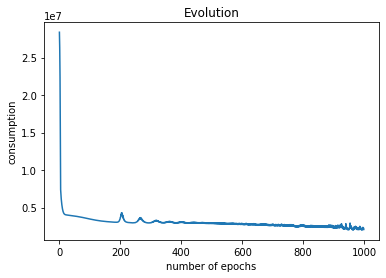

In [107]:
fig, ax = plt.subplots()
x = np.arange(len(items))
ax.plot(x, items)
ax.set(xlabel='number of epochs', ylabel='consumption',
       title='Evolution')
plt.show()